###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Text Mining & Image Recognition
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 2

#### Cargar Librerias

In [28]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Problema 1

Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones,
donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel.

In [43]:
def imagen_3d(imagen):

    # Leer la imagen en escala de grises
    img=cv2.imread(imagen,cv2.IMREAD_GRAYSCALE)

    #Dimensiones de imagen
    alto=img.shape[0]
    ancho=img.shape[1]

    # Crear la matriz de coordenadas X y Y
    x = np.arange(0, ancho)
    y = np.arange(0, alto)
    X, Y = np.meshgrid(x, y)

    # Visualizar imagen original
    print("Imagen Original")
    plt.imshow(img, cmap="gray")
    plt.show()

    # Crear una figura y un eje 3D
    fig = plt.figure(figsize=(12, 8))
    eje_3d = fig.add_subplot(111, projection='3d')

    # Mostrar la imagen
    print("Imagen en 3D")
    eje_3d.plot_surface(X, Y, img, cmap='gray')
    eje_3d.set_xlabel('X')
    eje_3d.set_ylabel('Y')
    eje_3d.set_zlabel('Intensidad')
    plt.show()






Imagen Original


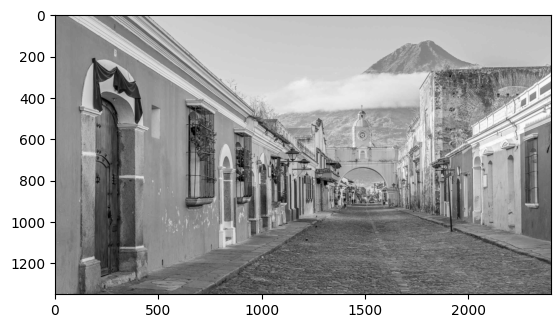

Imagen en 3D


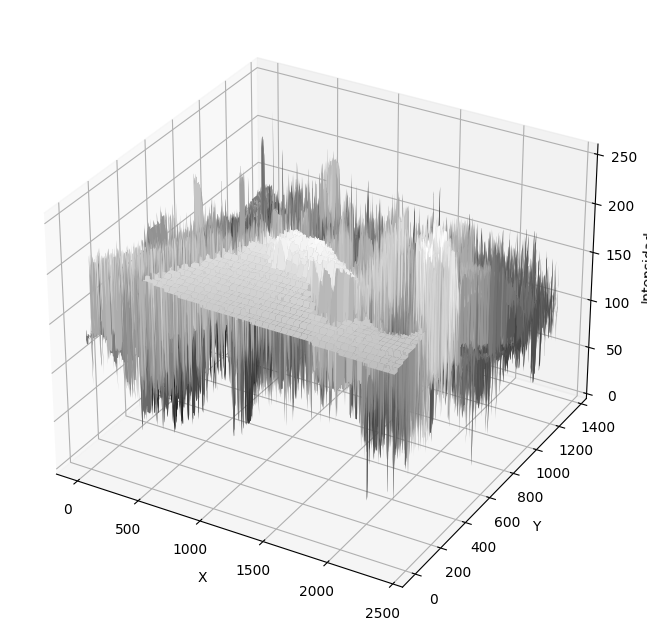

In [44]:
# Usar la funcion
imagen_3d("AntiguaGuatemalaGray.jpg")